# **PROJECT 1: HYBRID IMAGES**

This is your first project of the computer vision (CSCI 4472) course. In this project, you will learn the basics of image processing functions using OpenCV and/or scikit image libraries and python. First few activities are designed for you to get familiar with basic i/o and processing utilities for images, e.g., image load, save, print the image data, drawing on images, image tramsofmrtaions, image padding etc. Please have the OpenCV Python tutorial (https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html) open in a browser tab and ready for your reference.

**Agenda for Recitations 1 and 2**


*   Learn to use OpenCV functions for basic image processing tasks
*   Apply image filtering operations
*   Create a hybrid image using high and low pass filters (See a teaser image below)




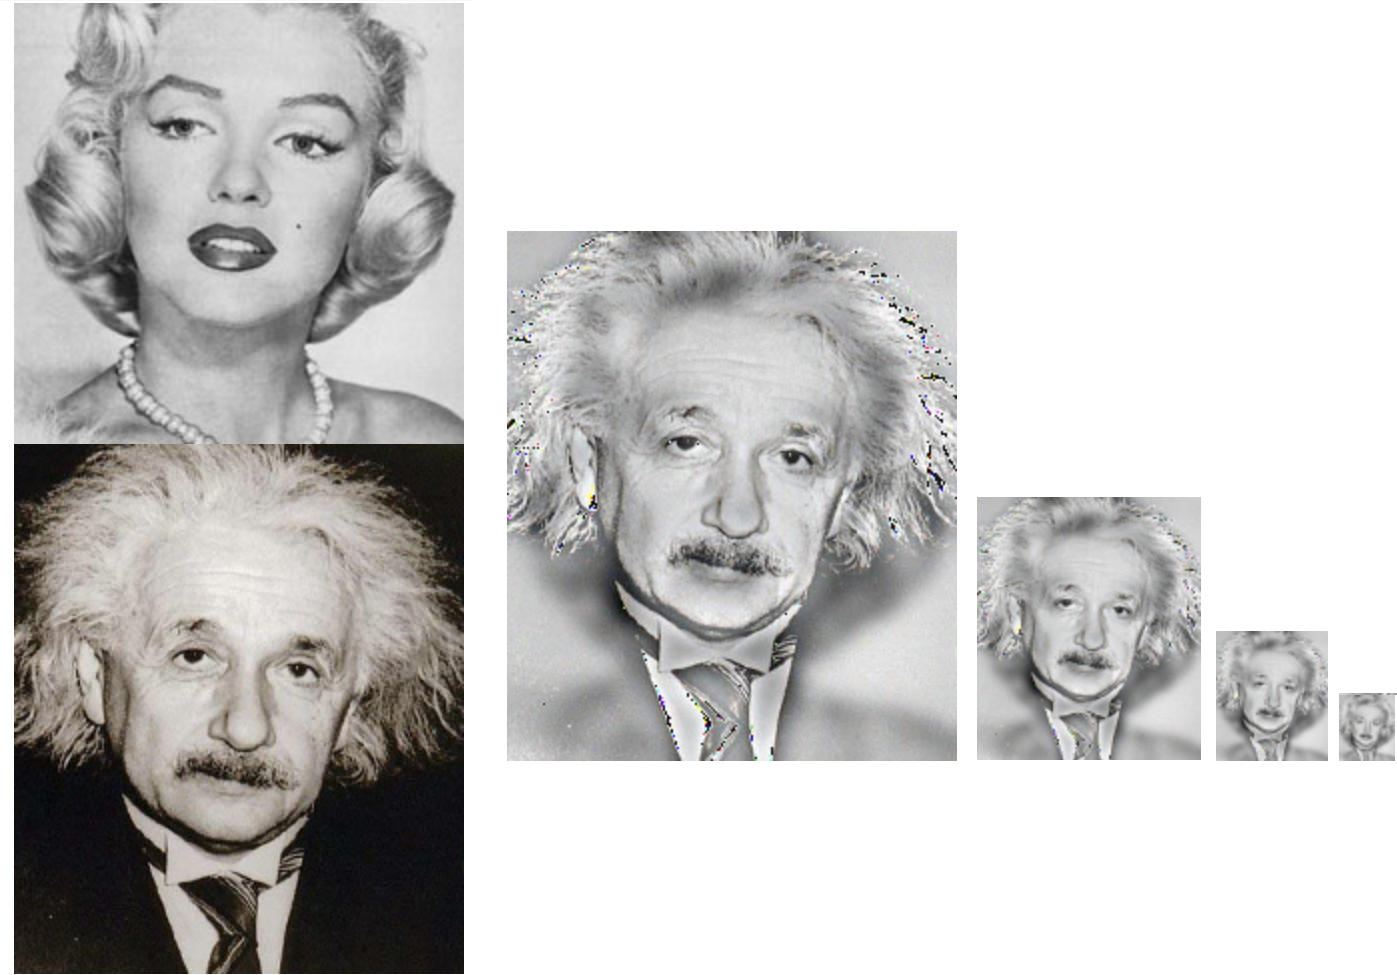

#**1. Getting Started**
We will use Google colab through out this course. Google colab is basically a free Jupyter notebook environment running completely in the cloud. Colab does not require a setup and it supports most popular machine learning libraries which can be easily loaded in your notebook.

To use colab, each one of you needs to have an account with Google. Those who have a Google account, you can use it to sign into colab. Those who don't have a Google account, please sign up for one, see https://accounts.google.com/signup/v2/webcreateaccount?continue=https%3A%2F%2Fmyaccount.google.com%3Futm_source%3Daccount-marketing-page%26utm_medium%3Dcreate-account-button&flowName=GlifWebSignIn&flowEntry=SignUp .



# **2. Basics**

Before executing the following python code, you have to upload the `Hybrid_Images` folder to your Google drive. Download the project from github repo into the `My Drive/Colab Notebooks` of your google drive. `Hybrid_Images` is available at https://github.com/jijup/CV-Lab . Now, let us mount the google drive and set the working directory to 'My Drive/Colab Notebooks/Hybrid_Images'.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')
root_dir = "/content/gdrive/MyDrive/Colab Notebooks/"
project_folder = "Hybrid_Images"
os.chdir(root_dir+project_folder)



Mounted at /content/gdrive/


Let us import relevant packages and modules. The first requirement is to import the OpenCV python module called cv2. We import `numpy` python package as we deal with images as multi dimensional arrays. NumPy has several functionalities to operate on matrices, linear algebra and fourier transforms etc. More details can be found at https://numpy.org/doc/stable/user/whatisnumpy.html

In [ ]:
import cv2
import numpy as np

Read and display an image. I have used OpenCV functions here. You may try skimage.io.imread function (https://scikit-image.org/docs/dev/api/skimage.io.html?highlight=imread#skimage.io.imread). 

We can read the image using imread module. It takes 2 arguments:

**path**: A string representing the path of the image to be read.

**flag**: It specifies the way in which image should be read. The default value is cv2.IMREAD_COLOR

There are 3 possible values of flag as shown below:
1.   cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
2.   cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
3. cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value -1 for this flag.

Since I'm using a colored image, I'll use 1. We will load `lenna.bmp` which is one of the classic test images of computer vision field. You can find the `lenna.bmp` in the `data` folder of the `Hybrid_Images` project folder.


In [ ]:
img = cv2.imread("./data/lenna.bmp", 1)


Image can be thought of as a 2D grid of cells with each cell (called pixel) having an intensity value. If the image is a color image, then each pixel will have multiple color channels, e.g., RGB images have three values for each pixel as shown in the following figure.

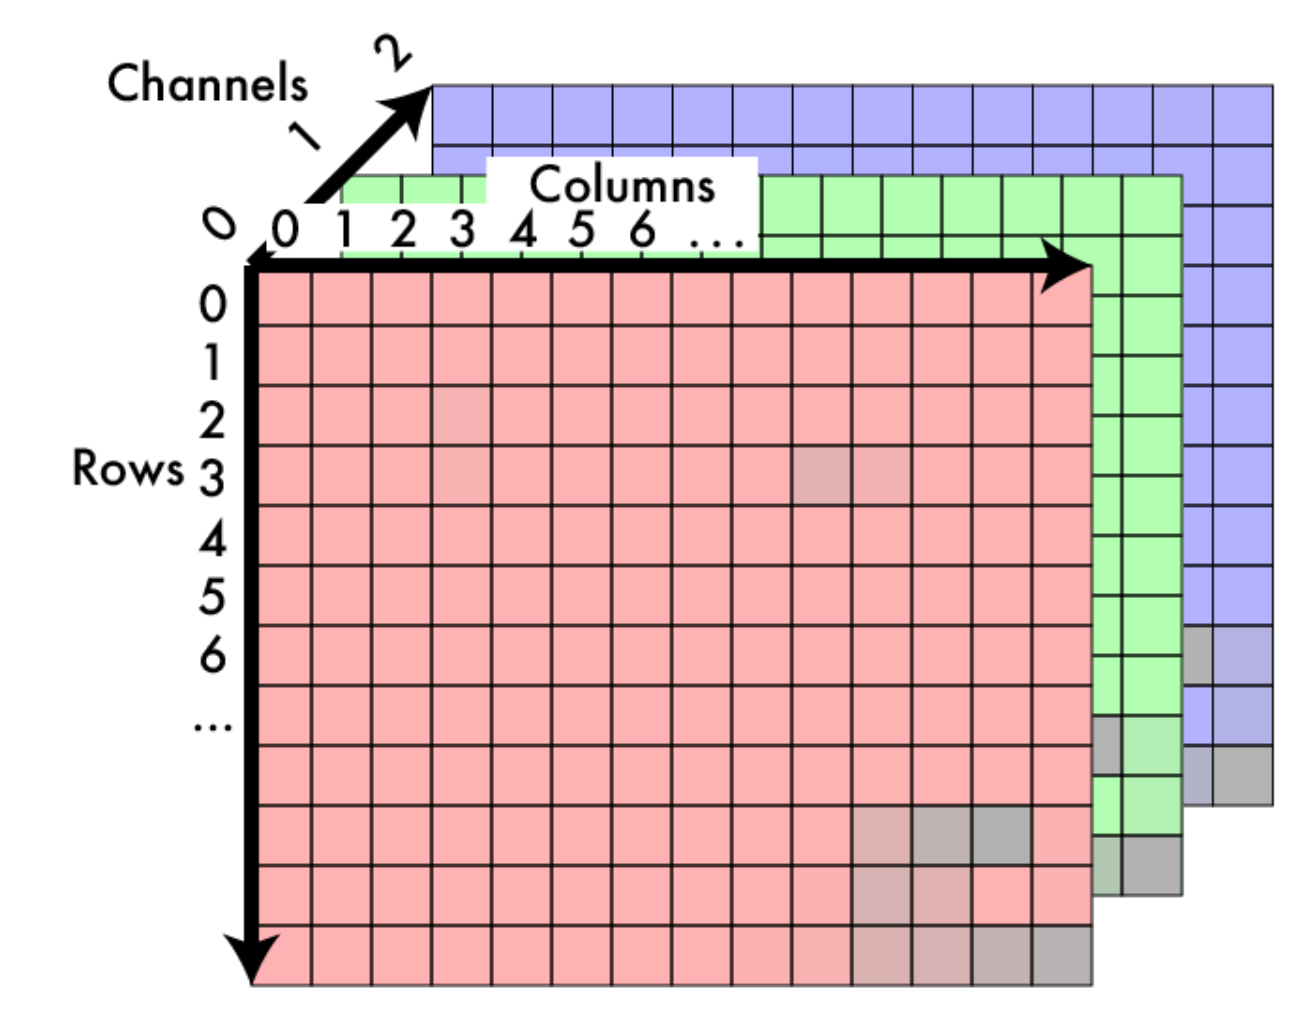

For displaying an image, OpenCV provides imshow() function. However, the imshow method is disabled in Google Colab. Thus, colab users need to import cv2_imshow for displaying images. cv2_imshow() can be imported from google.colab.patches.

Now, just displaying the image often leads to crashing.

**The Problem** The Notebook it is not usually happy to accommodate the window created by imshow. So it just crashes the window.

**The Solution** To solve this, you need to explicitly close the window when you are done with it. To accomplish this, you can use the cv2.destroyAllWindows() functionality.

Since you probably don’t want your screen to close immediately, you can tell OpenCV to wait for a keypress.

waitKey(0) will display the window infinitely until any keypress (it is suitable for image display).

waitKey(1) will display a frame for 1 ms, after which display will be automatically closed. If you specify 25 inside the brackets, it will display for 25ms.

Finally, we use destroyAllWindows to close the window based on the waitForKey parameter.

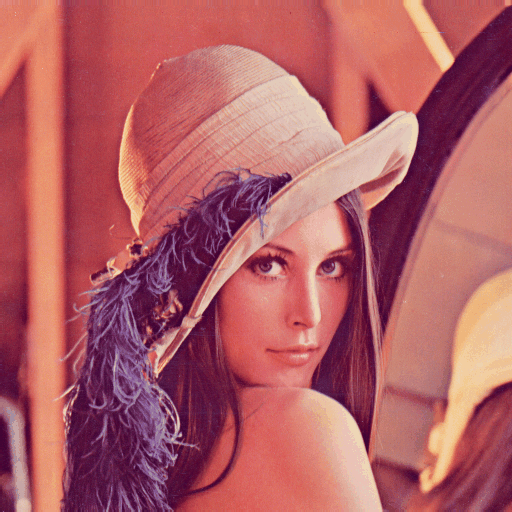

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

Let us find some details about the Lenna image.

By shape of the image, we mean the shape of the NumPy array. As you see from executing the code, the matrix consists of 512 rows and 512 columns.

The last value 3 indicates the no. of channels. If it is 

*   3, then a coloured image
*   1, a black and white/grayscale image

Executing the below code, you can find that the image is a numpy array, the data type is unsigned int. The size of the image is 786432 (512x512x3). Finally, the array values are printed.

In [ ]:
print(img.shape)
print(type(img))
print(img.dtype)
print(img.size)
print(img) 

To access a pixel value, you just use the array with the correspondong indices. It shows the RGB values. By OpenCV convention, the first value corresponds to B, the second to G and the third corresponds to R, i.e., OpenCV reads RGB as BGR.

In [ ]:
pixel = img[25, 100]
print(pixel)

OpenCV provides imwrite() function to save an image. After executing the below code, you may verify the saved image under your 'results' folder.

In [ ]:
 
cv2.imwrite("./results/lenna_color.bmp", img)


To copy an image, you can use `image.copy()`

In [ ]:
img_copy = img.copy()
cv2_imshow(img_copy)


##**2.1. Function to display images in a grid (25%)**

Your activity number 1. Please find below a simple python function to create an image grid. The function takes a list of `n` images and displays an image grid containing `n` images arranged in an `n/cols x cols` fashion as shown in the figure. 
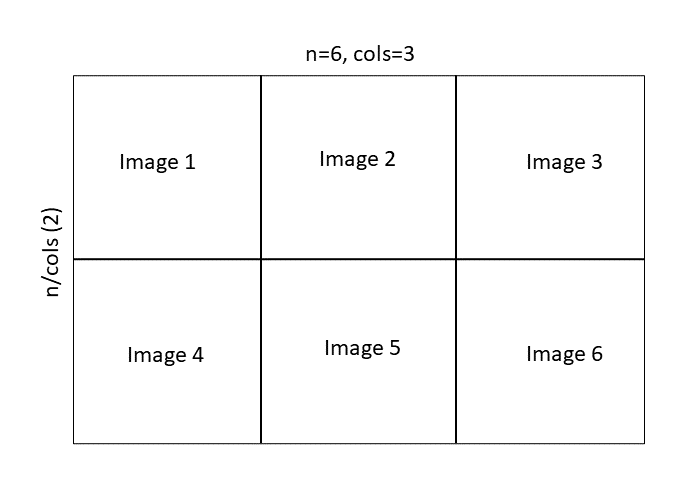

You have to complete the following function. All you have to do is the following.


1.   Find the number of rows of the grid (HINT:` length` of the image list and `cols` can be used to get the `rows`)
2.   Create a figure using `matplotlib.pyplot.figure()` (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
3. Use nested loops to create the grid. Outer loop iterates over the rows and inner loop iterates over the columns of the grid. 
4. In the inner loop, you may use `add_subplot()` available in `figure` API to create th subplots, see https://matplotlib.org/stable/api/figure_api.html
5. Depending on the number of images and the cols, you may get a partially filled last row. Appropriate checks need to be done to correctly implement the last row of the grid.


In [ ]:
#Graded Activity: 1

import math
import matplotlib.pyplot as plt

def grid_image(img_list, cols):
  #Get number of rows in the image grid
  length = len(img_list)
  rows= math.ceil(length/cols)
   
  # create a new figure of size 12 x 12 inches
  fig=plt.figure(figsize=(12,12))

  #for loops: 
  #outer loop goes from 0 to rows*cols with a step size of cols (iterates over rows)
  for i in range(0, rows*cols, cols):    
    #inner loop iterates over columns with a step size of one
    if i<rows :
      for j in range(0, cols):        
        fig.add_subplot(rows,cols, i+j+1)
        plt.imshow(cv2.cvtColor(img_list[i+j], cv2.COLOR_BGR2RGB))
    else:
      if length%cols == 0: 
        for j in range(0, cols):        
          fig.add_subplot(rows,cols, i+j+1)
          plt.imshow(cv2.cvtColor(img_list[i+1], cv2.COLOR_BGR2RGB))
      else:
        for j in range(0, length%cols):        
          fig.add_subplot(rows,cols, i+j+1)
          plt.imshow(cv2.cvtColor(img_list[i+j], cv2.COLOR_BGR2RGB))  
 

##**2.2. Geometric Primitives**
You candraw geometric primtives (line, circle etc.) on images using drawing functions of cv2. In the code snippet below, ywe use  `cv.line(), cv.circle() , cv.rectangle()` to draw the primitives. These drawing functions take `thickness` and `color` as parameters along with the `image` and other attributes relevant to draw the primitive, e.g.,  `spatial coordinates` for the line and rectangle. Note that primitives such as rectangular boxes will be useful for computer vison tasks such as object detection in which you have to locate the objects using bounding boxes.

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

#rectangle
baboon = cv2.imread("./data/baboon.bmp", 1)
green = (0, 255, 0)
thickness = 8
img_rect = cv2.rectangle(baboon, (100, 100), (400, 400), green, thickness)

#Line
barbara = cv2.imread("./data/barbara.bmp", 1)
blue = (255, 0, 0)
thickness = 8
img_line = cv2.line(barbara, (0,0), (512, 512), blue, thickness)


#Circle
pepper = cv2.imread("./data/pepper.bmp", 1)
red = (0, 0, 255)
img_circle = cv2.circle(pepper, (256,256), 100, red, thickness)

#ellipse


img_list=[img_rect, img_line, img_circle]
grid_image(img_list, 2)



##**2.3. Color Spaces**
Color space conversions are often necessary for various computer vison tasks. There are several color spaces available in OpenCV, e.g., RGB, LAB or HSV. Conversion between different color spaces can be done using `cvtColor()`. THe function takes `img` and a color conversion `code`, see [this](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html) page for more conversion codes. Note that OpenCV RGB color specification follows blue, green and red order, i.e., if you provide values (20, 102, 200), the value 20 is mapped to blue, not the red. Let us do some color conversions. The image lenna.bmp is a color image. we will first convert it to a gray scale image, then to an HSV image and YUV image.

In [ ]:
#RGB (BGR) to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


#BGR to YUV
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
 

img_list=[img, gray, hsv, yuv]
grid_image(img_list, 2)



##**2.4. Image Transformations**

Image transformations such as rotations, scaling and translation play an important part of many computer vison algorithms. So let us do a couple of activities to learn the OpenCV functions for image translation.

Here we will use `warpAffine(..)` function for the transformation. The function takes the source image, the transformation matrix (rotation/translation) and the image size. The function does the appropriate transformation on the image. To know more about this function read here https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html

In [ ]:
#Image Translation

rows,cols = img.shape[:2] #get shape in terms of pixels
T = np.float32([[1, 0, 75], [0, 1, 150]])
trans_img = cv2.warpAffine(img,T,(cols,rows))

#Image Rotation
R = cv2.getRotationMatrix2D(((cols-1) / 2.0, (rows-1) / 2.0), 30, 1)
rot_img = cv2.warpAffine(img, R, (cols, rows))

img_list = [img, trans_img, rot_img]
grid_image(img_list, 3)


Image resizing is an important part of image processing. We use this function to downsample or upsample an image. The scale factor along the horizontal and vertical axes can be specified using `fx` and `fy`. If you want to downsample your image to its half size, use `fx=0.5` and `fy=0.5`. Similarly to emlarge an image, you can use scaling factors >1. 

When we do the image resizing, we have to specify the interpolation scheme that must be used. This is a flag that takes one of the following methods. 

INTER_NEAREST – a nearest-neighbor interpolation 

INTER_LINEAR – a bilinear interpolation (used by default) 

INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.

INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood



In [ ]:
#Image resizing-try nearest neighbor, cubic, bilinear and interpolation schemes
res_nn = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation = cv2.INTER_NEAREST)
res_cubic = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
res_linear = cv2.resize(img, None, fx=.5, fy=.5, interpolation = cv2.INTER_LINEAR)
res_area = cv2.resize(img, None, fx=.5, fy=.5, interpolation = cv2.INTER_AREA)

img_list = [res_nn, res_cubic, res_linear, res_area]
grid_image(img_list, 4)

##**2.5. Image Padding**
Image padding-adding border to the images. This is important when doing convolution. As we discussed in Lecture 3, when you do a convolution, you may generate image with reduced size if appropriate image padding is not done.  


If you want to create a border around the image, something like a photo frame, you can use `cv2.copyMakeBorder()` function. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

`src` - input image

`top, bottom, left, right` - border width in number of pixels in corresponding directions

`borderType` - Flag defining what kind of border to be added. 
It can be following types:

cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.

cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb

cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba

cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh

cv2.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg

value - Color of border if border type is cv2.BORDER_CONSTANT

In [ ]:
replicate = cv2.copyMakeBorder(img,30,30,30,30,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)

img_list = [img, replicate, reflect, wrap]

grid_image(img_list,4)

# **3. Image Filtering**

In this section, you will learn how to design and apply image filters. We will start with the implementation of convolution operation. We have provided a skeleton code of the function below. Your task is to fill in the required code to get that function working as intended.

In image processing, **Convolution** is the process of transforming an image by applying a kernel over each pixel and its local neighbors across the entire image. The **kernel** is a matrix of values whose size and values determine the transformation effect of the convolution process. Typical size of the kernel is 3 x 3, but other sizes (e.g., 5 x 5, 10 x 10) are also used. 

Three main steps of convolution are the following.  

1.   The algorithm places the Kernel Matrix (h(x, y)) over each pixel of the image (f(x, y)) (ensuring that the full Kernel is within the image), multiplies each value of the Kernel with the corresponding pixel it is over.
2.   Then, sums the resulting multiplied values and returns the resulting value as the new value of the center pixel.
3. This process is repeated across the entire image to get the new image (g(x,y)). See the illustration below.

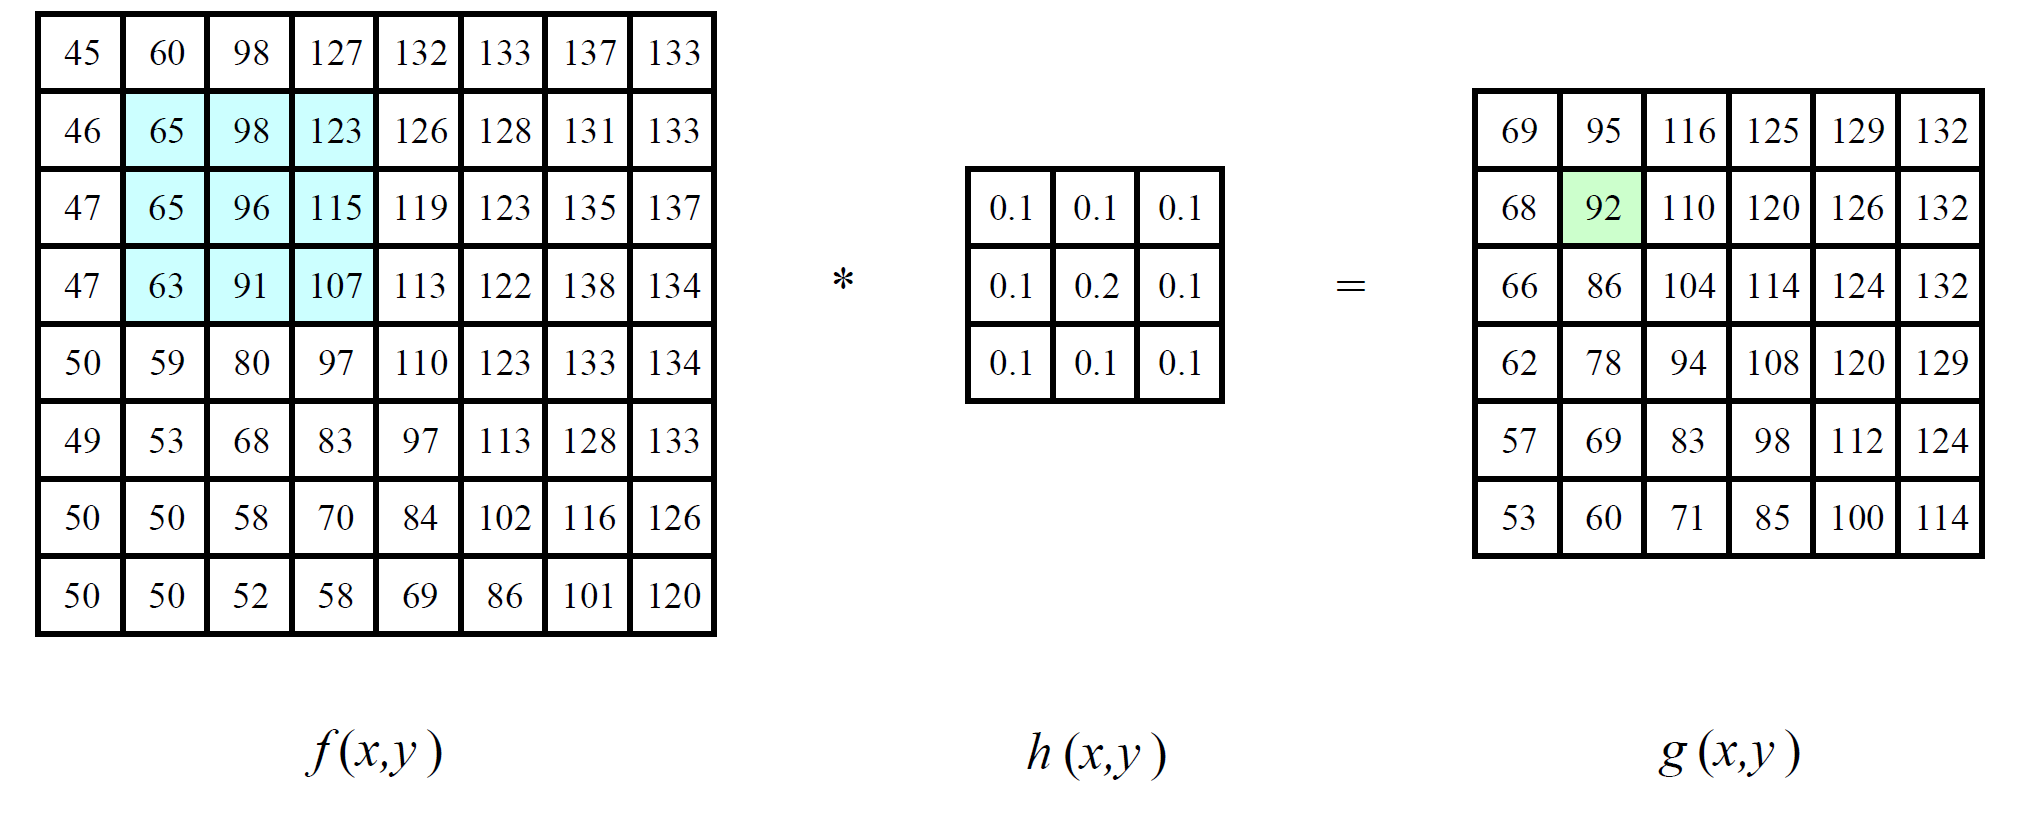

## **3.1 Write a convolution function (25%)**

The following function takes as input an image and a kernel, convolve the image with kernel and returns the convolved image. The function first extracts the sizes of the image and kernel. Inorder to ensure that the kernel is placed within the image, we use `pad_h` and `pad_w`. Three loops are used to iterate over the height, width and the color channels of the image. Your task is to define the sub-region in the image called `center` on which the kernel will be convolved in each iteration the loops. Then perform the multiplication of the pixel values, add the values and write the result as the new value of the center pixel.


Note that the output of the convolution process changes with the kernel size and values. We will see some examples in the subsequent activties.


In [ ]:
#Graded activity: 2

def convolution(image: np.array, kernel: np.array) -> np.array:
    
    # Flip template before convolution. Find out why?
    kernel = cv2.flip(kernel, -1)

    # Get sizes of image and kernel. Third value of shape is colour channel. Ise image.shape[] with appropriate indices
    (image_h, image_w) = _______
    (kernel_h, kernel_w) = _______
    (pad_h, pad_w) = (kernel_h // 2, kernel_w // 2)

    # Create the output image, initialize it with zeros. Use np.zeros() with the shape of the image.
    output = _______


    # Slide kernel across every pixel.
    for y in range(pad_h, image_h - pad_h):
        for x in range(pad_w, image_w - pad_w):
            # colour channels.
            for colour in range(image.shape[2]):

                # Get sub regions of the image for convolution. HINT: horizontally, it will be x-pad_h to x+pad_h+1.
                center = ___________

                # Perform convolution and write back value to output image. 
                output[y, x, colour] = (center * kernel).sum()                

    # Return the result of the convolution.        
    return output

Now let us use convolution to do some image filtering. We have to define the kernel matrix first as shown below. The kernel that we use below is a high-pass filter which allow only high frequency signals. Normally high frequency signals are found along the edges and hence you can see the edges in the filtered image.

In [ ]:
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

res_image = convolution(img, kernel)
cv2_imshow(res_image)

 

OpenCV provides a convolution function called 'filter2D()'. Perform the convolution using OpenCV filter2D.

In [ ]:
#openCV filter2D
cvres_image = cv2.filter2D(img,-1, kernel)
cv2_imshow(cvres_image)


## **3.2 Create your own box filter (10%)**
Your next task is to create an average/mean/box filter. This is a smoothing kernel (or filter) which reduces the amount of intensity variation between one pixel and the next. The idea of mean filter is to replace each pixel value in an image with the mean (`average') value of its neighbors, including itself. A box filter looks like the following.

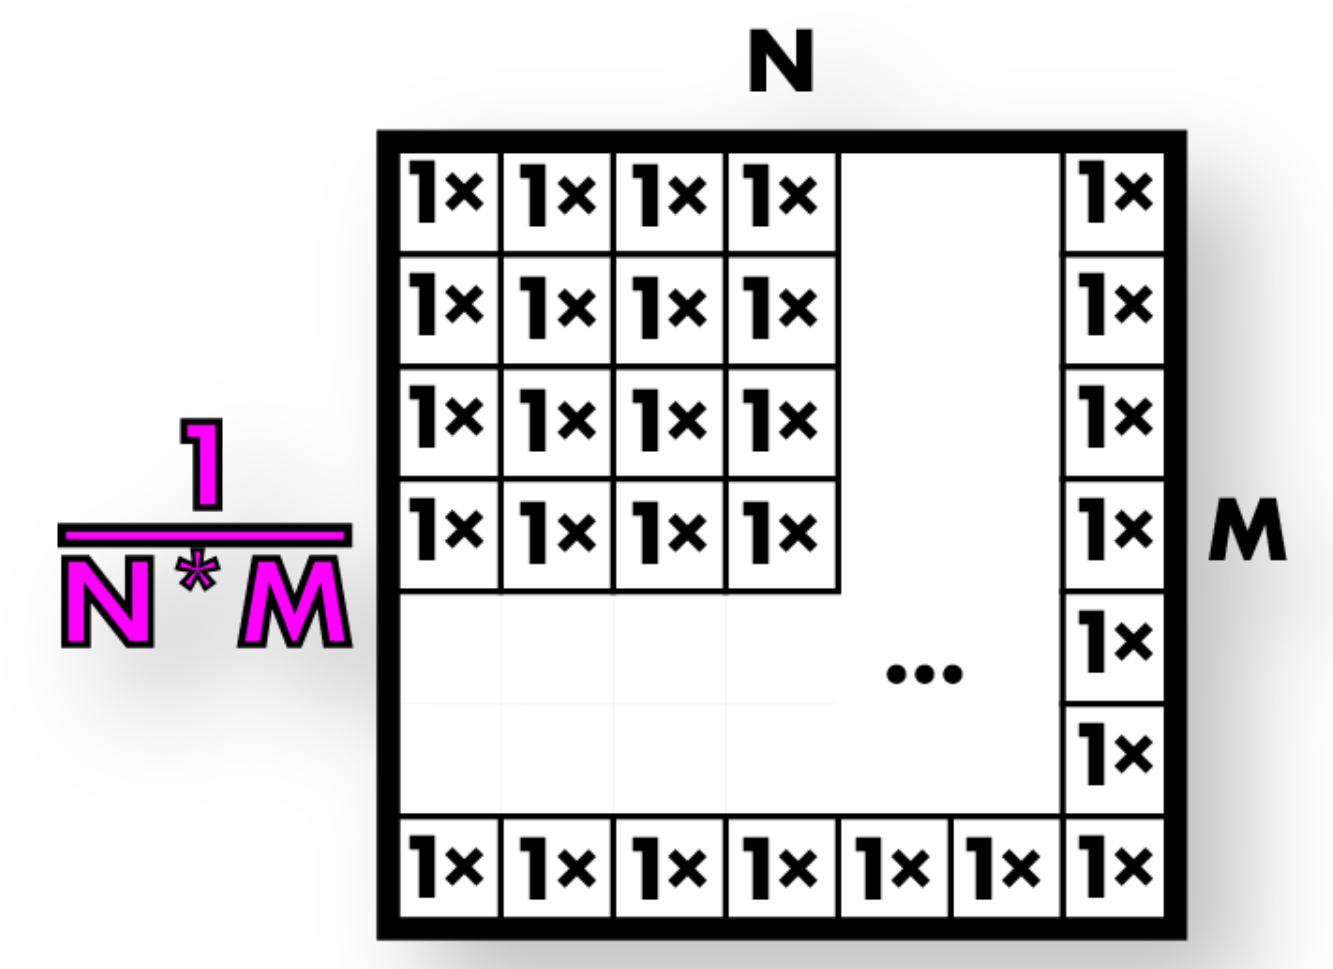

In [ ]:
#Graded activity: 3
val = _____
kernel = np.array(_____)

res_image = cv2.filter2D(img,-1, kernel)
cv2_imshow(res_image)

## **3.3 Implement a Gaussian kernel (15%)**

Gaussian kernel is widely used for image smoothing.Gaussian kernel has the shape of the function ‘Gaussian distribution’ to define the weights inside the kernel, which are used to compute the weighted average of the neighboring points (pixels) in an image. Eeach value in the Gaussian filter is from the zero mean Gaussian distribution. One thing we need to keep in mind is that the kernel size is dependent of standard devidation 𝛔 of Gaussian function:

As a rule of thumb, kernel size = `2. ceil(3𝛔)+1`

99% of the probability mass for a gaussian is within +/- 3 standard deviations so make the kernel be 6 times the size of sigma. But also we want an odd number, so make it be the next highest odd integer from 6 x sigma.

Implement `gaussian_kernel(sigma)` which will take a standard deviation value and return a filter that smooths using a gaussian with that sigma. What should be the size of the filter?  

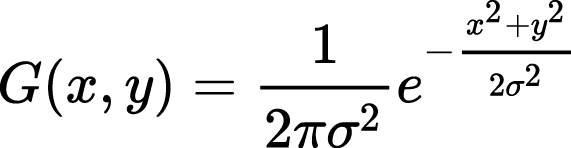

We need to fill in our kernel with some values. Use the probability density function for a 2d gaussian:

In [ ]:
#Graded activity: 4
def gaussian_kernel(sigma):
    
    #filter/kernel/mask size. Read the instructions above
    filter_size = __________

    #initialize the kernel with zeros
    gaussian_kernel = __________
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            # 2. pi. sigma^2
            x1 =______
            # exponent part
            x2 = __________
            
            gaussian_kernel[x+m, y+n] = (1/x1)*x2
    
    return gaussian_kernel
  

In [ ]:
kernel = gaussian_kernel(sigma=3)
gauss_img = cv2.filter2D(img,-1, kernel)


gaussian_blur = cv2.GaussianBlur(src=img, ksize=(25,25), sigmaX=3, sigmaY=3)

img_list = [gauss_img, gaussian_blur]

grid_image(img_list, 2)


## **3.4 Other Filters** 
Few other filters (sharpening, embossing, median etc.) for you to try.

**Sharpening** You may use a 3 x 3 filter for sharpening. A sharpening filter can also be implemented by the following steps: Take a smoothed image, subtracts it from the original image to obtain the "details" of the image, and then adds the "details" to the original image.



In [ ]:

## Sharpening
kernel = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])
sharpened_img = cv2.filter2D(img,-1, kernel)
cv2_imshow(sharpened_img)

##A second option-Adding the details
smooth = cv2.GaussianBlur(src=img, ksize=(51,51), sigmaX=3, sigmaY=3)
details = img - smooth
sharp = img + details
cv2_imshow(sharp)

**Embossing** Use a 3 x 3 filter for embossing. This filter stamps and carves the selection, giving it an appearance with bumps and hollows. Bright areas are raised and dark ones are carved. 

In [ ]:
#Emboss
kernel = np.array([
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2]
])
emb_image = cv2.filter2D(img,-1, kernel)
cv2_imshow(emb_image)


##**3.5 Non-linear Filters (10%)**
A non-linear filtering is one that cannot be done with convolution. A sliding median filter is a simple example of a non-linear filter.

**Median Filter** Median Filter is one of Non-linear filters, which is also used for smoothing. Its basic idea is to replace each pixel by the median of its neigboring pixels (pixels in the window). Median filter works well with noisy images.

 In the following code, we generate synthetic noise (gaussian, salt & pepper) using the `random_noise` function from skimage. Then we apply median filter as well as gaussian filters to see the difference.

 Your task is to generate a grid image of gaussian and median filtered images with kernel sizes 3, 5 and 7. Observe the differences.

In [ ]:
#Graded activity: 5

from skimage.util import random_noise

#Generate salt & pepper noise

sp_noise_img = random_noise(img, mode='s&p', amount=0.11)

sp=cv2.convertScaleAbs(sp_noise_img, alpha = (255/1))

# create median filtered images

median3 =_____________
median5 = ____________
median7 = ____________

# create gaussian filtered images


gauss3 = _______
gauss5 = _______
gauss7 = _______

img_list=[median3, median5, median7, gauss3, gauss5, gauss7]
grid_image(img_list, 3)


# **4. Hybrid Images (25%)**

Gaussian filters are cool because they are a true low-pass filter for the image. This means when we run them on an image we only get the low-frequency changes in an image like color. Conversely, we can subtract this low-frequency information from the original image to get the high frequency information!

 We can also make really interesting images that look different depending on if you are close or far away from them. That's what we'll be doing. They are hybrid images that take low frequency information from one image and high frequency info from another, i.e., a hybrid image is the sum of a low-pass filtered version of the one image and a high-pass filtered version of a second image.

 In the code below, you can read two images, an image of a cat and an image of a dog and try to create a hybrid image of them. Use Gaussian filter for setting up a simplified version of the hybrid image. Guassian filter will give us the low frequency signals from one image. To get the high frequency signals from the second, you can subtract its low frequency compoenents from the original image.

 Once the hybrid image is created, you can downsample (resize) the images to various resolution to create the effect of viewing from far.


In [ ]:
#Graded activity: 6
def create_hybrid(low_image, high_image):
  print("Creating hybrid image...")
  #Extract low frequency from first image (Gaussian-use OpenCV python). Use a kernel size of 101
  low = ______

  #Extract high frequency from second image (Image-Gaussian)
  high = _______


  # Add these two frequencies to get the desired image
  hybrid =  _______
  cv2_imshow(hybrid)
  
  for i in range(0,3):
    hybrid = cv2.resize(hybrid, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    cv2_imshow(hybrid)


In [ ]:
# Create the hybrid image of Einstein and Marilyn

mar = cv2.imread("./data/marilyn.bmp")
cv2_imshow(mar)

ein = cv2.imread("./data/einstein.bmp")
cv2_imshow(ein)

create_hybrid(mar, ein)

 

You may try creating hybrid images of cat and dog given in the data folder.

In [ ]:

#Exercise-Construct hybrid images
cat = cv2.imread("./data/cat.bmp")
cv2_imshow(cat)

dog = cv2.imread("./data/dog.bmp")
cv2_imshow(dog)
create_hybrid(cat, dog)


#**6. Evaluation Details**

This tutorial project is meant to be done in two recitations (Sept 14 & Sept. 21). You will get a total of 8 days to complete the activities. Attendance in each recitation is mandatory to get marks for the graded activities. We will record your attendance. If you complete all the activities in the first recitation itself, then the second recitation is optional. You have to read the instructions and do all the exercises, refer to the materials as and when necessary (especially for syntaxes). Evaluation will be done in the recitations, mainly in the second recitation. Lab instructors will come to you to evaluate your work. During the evaluation, you will be asked to show the graded activities and you may expect a couple of related questions.

**NOTE** In case you are unable to attend the recitation, you have to inform the instructor before the recitation and absence due to sickness orr other genuine grounds will be considered.

# **5. References**

1. https://courses.cs.washington.edu/courses/cse576/20sp/ (Homework problems)
2. Hybrid Images, Olivia et al., http://olivalab.mit.edu/hybridimage.htm
